In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/haram4th/ablearn/main/advertising.csv')
data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,NaN,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,3/27/2016 0:53,0
1,80.23,31.0,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,3/13/2016 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,1/10/2016 2:31,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,6/3/2016 3:36,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30.0,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2/11/2016 21:49,1
996,51.30,45.0,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,4/22/2016 2:07,1
997,51.63,51.0,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2/1/2016 17:24,1
998,55.55,19.0,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,3/24/2016 2:35,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       916 non-null    float64
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 78.2+ KB


In [4]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,916.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.128821,55000.000080,180.000100,0.481000,0.50000
std,15.853615,9.018548,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [5]:
data[data['Age'].isna()]['Clicked on Ad'].value_counts()

Clicked on Ad
0    46
1    38
Name: count, dtype: int64

In [6]:
# 컬럼명 리스트 만들기
cols = list(data.columns)
cols

['Daily Time Spent on Site',
 'Age',
 'Area Income',
 'Daily Internet Usage',
 'Ad Topic Line',
 'City',
 'Male',
 'Country',
 'Timestamp',
 'Clicked on Ad']

In [7]:
# 컬럼명에 띄어쓰기 없애고 언더바 넣기
col = []
for i in cols :
    col.append(i.replace(' ', '_'))
col

['Daily_Time_Spent_on_Site',
 'Age',
 'Area_Income',
 'Daily_Internet_Usage',
 'Ad_Topic_Line',
 'City',
 'Male',
 'Country',
 'Timestamp',
 'Clicked_on_Ad']

In [8]:
# 컬럼명 띄어쓰기 없앤 걸로 지정
data.columns = col

In [9]:
data.columns

Index(['Daily_Time_Spent_on_Site', 'Age', 'Area_Income',
       'Daily_Internet_Usage', 'Ad_Topic_Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked_on_Ad'],
      dtype='object')

In [10]:
# 잘 들어갔나 확인
data.head()

,Daily_Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Ad_Topic_Line,City,Male,Country,Timestamp,Clicked_on_Ad
0,68.95,NaN,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,3/27/2016 0:53,0
1,80.23,31.0,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,3/13/2016 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,1/10/2016 2:31,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,6/3/2016 3:36,0


- 나이가 nan인 행들을 처리해야 하는데 나이를 추정할 수 있는 건 없어서 삭제하거나 평균으로 지정하거나인데
- 평균으로 굳이 지정할 이유는 없어서 그냥 삭제해버리기

In [11]:
data['Age'].isna()

0       True
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: Age, Length: 1000, dtype: bool

In [12]:
data = data.dropna()

In [13]:
data['percent']=data['Daily_Time_Spent_on_Site'] / data['Daily_Internet_Usage'] * 100

/tmp/ipykernel_101895/119710355.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['percent']=data['Daily_Time_Spent_on_Site'] / data['Daily_Internet_Usage'] * 100


In [14]:
data.head()

,Daily_Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Ad_Topic_Line,City,Male,Country,Timestamp,Clicked_on_Ad,percent
1,80.23,31.0,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0,41.404758
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,3/13/2016 20:35,0,29.374207
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,1/10/2016 2:31,0,30.155761
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,6/3/2016 3:36,0,30.308538
5,59.99,23.0,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,5/19/2016 14:30,0,26.457617


In [15]:
len(data)

916

In [16]:
data = data.drop(['Ad_Topic_Line', 'City', 'Country', 'Timestamp'], axis = 1)

In [17]:
data

,Daily_Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Male,Clicked_on_Ad,percent
1,80.23,31.0,68441.85,193.77,1,0,41.404758
2,69.47,26.0,59785.94,236.50,0,0,29.374207
3,74.15,29.0,54806.18,245.89,1,0,30.155761
4,68.37,35.0,73889.99,225.58,0,0,30.308538
5,59.99,23.0,59761.56,226.74,1,0,26.457617
...,...,...,...,...,...,...,...
995,72.97,30.0,71384.57,208.58,1,1,34.984179
996,51.30,45.0,67782.17,134.42,1,1,38.163964
997,51.63,51.0,42415.72,120.37,1,1,42.892747
998,55.55,19.0,41920.79,187.95,0,0,29.555733


In [18]:
data['Sex'] = pd.get_dummies(data['Male'], drop_first = True)
data = data.drop('Male', axis = 1)

In [19]:
data.corr()

,Daily_Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Clicked_on_Ad,percent,Sex
Daily_Time_Spent_on_Site,1.000000,-0.337082,0.310325,0.514261,-0.746936,0.454540,-0.026391
Age,-0.337082,1.000000,-0.193798,-0.377338,0.503014,0.069176,-0.017407
Area_Income,0.310325,-0.193798,1.000000,0.335125,-0.471812,-0.053987,-0.001068
Daily_Internet_Usage,0.514261,-0.377338,0.335125,1.000000,-0.784050,-0.504092,0.013625
Clicked_on_Ad,-0.746936,0.503014,-0.471812,-0.784050,1.000000,0.089912,-0.028081
percent,0.454540,0.069176,-0.053987,-0.504092,0.089912,1.000000,-0.054386
Sex,-0.026391,-0.017407,-0.001068,0.013625,-0.028081,-0.054386,1.000000


<Axes: >

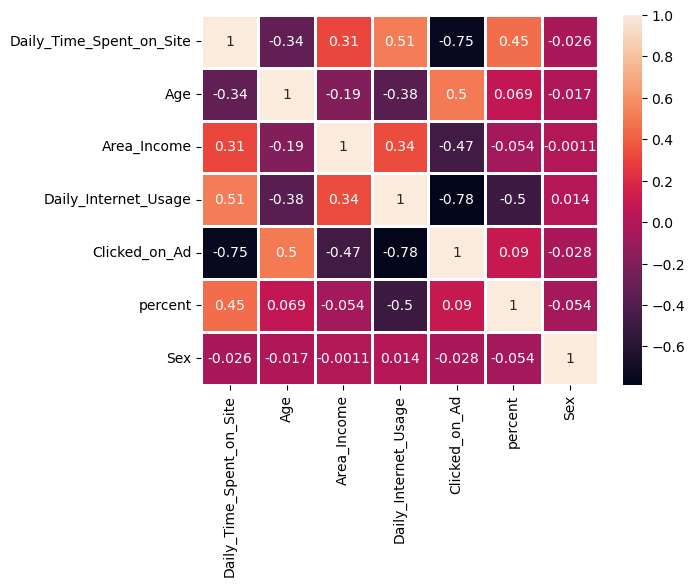

In [20]:
sns.heatmap(data.corr(), linewidth = 1, annot = True)

In [21]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [22]:
X = data.drop('Clicked_on_Ad', axis = 1)
y = data['Clicked_on_Ad']

In [23]:
mms = MinMaxScaler()
scaled_X = mms.fit_transform(X)

In [24]:
scaled_X = pd.DataFrame(scaled_X, columns = ['Daily_Time_Spent_on_Site', 'Age', 'Area_Income', 'Daily_Internet_Usage', 'Male', 'percent'])
scaled_X

,Daily_Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Male,percent
0,0.810448,0.285714,0.831375,0.538746,0.492961,1.0
1,0.627361,0.166667,0.699200,0.797433,0.252861,0.0
2,0.706993,0.238095,0.623160,0.854280,0.268459,1.0
3,0.608644,0.380952,0.914568,0.731323,0.271508,0.0
4,0.466054,0.095238,0.698828,0.738346,0.194653,1.0
...,...,...,...,...,...,...
911,0.686915,0.261905,0.876310,0.628405,0.364822,1.0
912,0.318190,0.619048,0.821302,0.179441,0.428283,1.0
913,0.323805,0.761905,0.433959,0.094382,0.522658,1.0
914,0.390505,0.000000,0.426401,0.503511,0.256484,0.0


In [25]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.4, random_state = 7)
for i in range(1, 10) :
    dtc = DecisionTreeClassifier(max_depth = i, random_state = 7)
    dtc.fit(X_train, y_train)
    pred = dtc.predict(X_test)
    print('=' * 20, i, '=' * 20)
    print(accuracy_score(y_test, pred))
    print(classification_report(y_test, pred))

==================== 1 ====================
0.896457765667575
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       185
           1       0.92      0.87      0.89       182

    accuracy                           0.90       367
   macro avg       0.90      0.90      0.90       367
weighted avg       0.90      0.90      0.90       367

==================== 2 ====================
0.9373297002724795
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       185
           1       0.98      0.90      0.93       182

    accuracy                           0.94       367
   macro avg       0.94      0.94      0.94       367
weighted avg       0.94      0.94      0.94       367

==================== 3 ====================
0.9373297002724795
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       185
           1       0.95      0.92      0.94      

### 강사님 버전

In [26]:
data = pd.read_csv('https://raw.githubusercontent.com/haram4th/ablearn/main/advertising.csv')
data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,NaN,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,3/27/2016 0:53,0
1,80.23,31.0,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,3/13/2016 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,1/10/2016 2:31,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,6/3/2016 3:36,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30.0,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2/11/2016 21:49,1
996,51.30,45.0,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,4/22/2016 2:07,1
997,51.63,51.0,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2/1/2016 17:24,1
998,55.55,19.0,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,3/24/2016 2:35,0


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       916 non-null    float64
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 78.2+ KB


In [28]:
data['Age'].isna().sum()

np.int64(84)

In [29]:
data['Age'].describe()

count    916.000000
mean      36.128821
std        9.018548
min       19.000000
25%       29.000000
50%       35.000000
75%       42.000000
max       61.000000
Name: Age, dtype: float64

In [30]:
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   float64
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 78.2+ KB


In [32]:
data['Area Income'].describe()

count     1000.000000
mean     55000.000080
std      13414.634022
min      13996.500000
25%      47031.802500
50%      57012.300000
75%      65470.635000
max      79484.800000
Name: Area Income, dtype: float64

In [33]:
47031.802500 - 1.5 * (65470.635000 - 47031.802500)

19373.553749999992

In [34]:
data[data['Area Income'] < 19373.553749999992]

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
135,49.89,39.000000,17709.98,160.03,Enhanced system-worthy application,East Michele,1,Belize,4/16/2016 12:09,1
410,48.09,33.000000,19345.36,180.42,Balanced motivating help-desk,West Travismouth,0,Heard Island and McDonald Islands,5/28/2016 12:38,1
510,57.86,30.000000,18819.34,166.86,Horizontal modular success,Estesfurt,0,Algeria,7/8/2016 17:14,1
640,64.63,45.000000,15598.29,158.80,Triple-buffered high-level Internet solution,Isaacborough,1,Azerbaijan,6/12/2016 3:11,1
665,58.05,36.128821,15879.10,195.54,Total asynchronous architecture,Sanderstown,1,Tajikistan,2/12/2016 10:39,1
692,66.26,47.000000,14548.06,179.04,Optional full-range projection,Matthewtown,1,Lebanon,4/25/2016 19:31,1
768,68.58,41.000000,13996.50,171.54,Exclusive discrete firmware,New Williamville,1,El Salvador,7/6/2016 12:04,1
778,52.67,44.000000,14775.50,191.26,Persevering 5thgeneration knowledge user,New Hollyberg,0,Jersey,5/19/2016 6:37,1
952,62.79,36.000000,18368.57,231.87,Total coherent archive,New James,1,Luxembourg,5/30/2016 20:08,1


<Axes: xlabel='Age', ylabel='Count'>

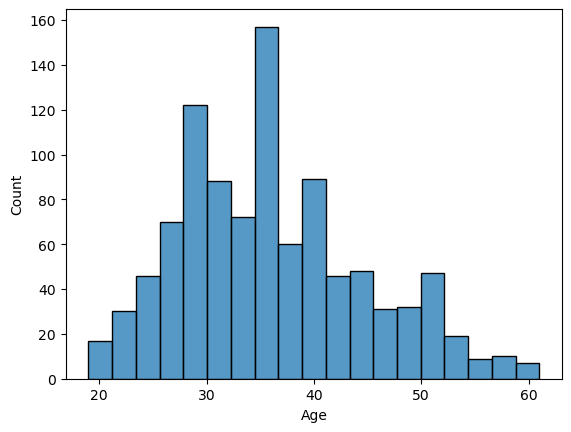

In [35]:
sns.histplot(data['Age'])

<Axes: xlabel='Area Income', ylabel='Count'>

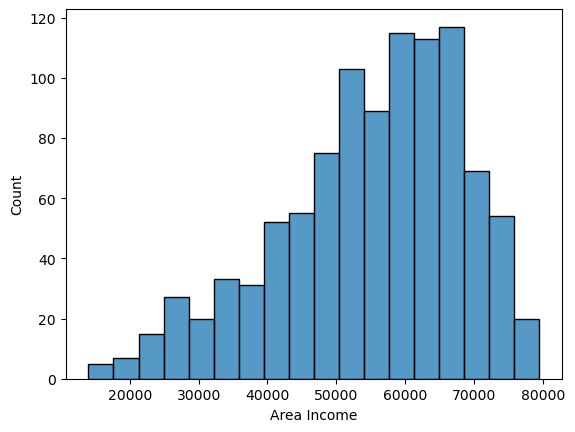

In [36]:
sns.histplot(data['Area Income'])

In [37]:
data['Daily Time Spent on Site'].describe()

count    1000.000000
mean       65.000200
std        15.853615
min        32.600000
25%        51.360000
50%        68.215000
75%        78.547500
max        91.430000
Name: Daily Time Spent on Site, dtype: float64

<Axes: xlabel='Daily Time Spent on Site', ylabel='Count'>

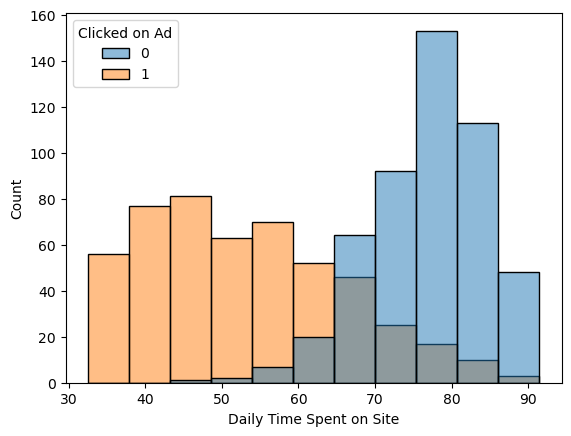

In [38]:
sns.histplot(x = 'Daily Time Spent on Site', hue = 'Clicked on Ad', data = data)

<Axes: xlabel='Daily Internet Usage', ylabel='Count'>

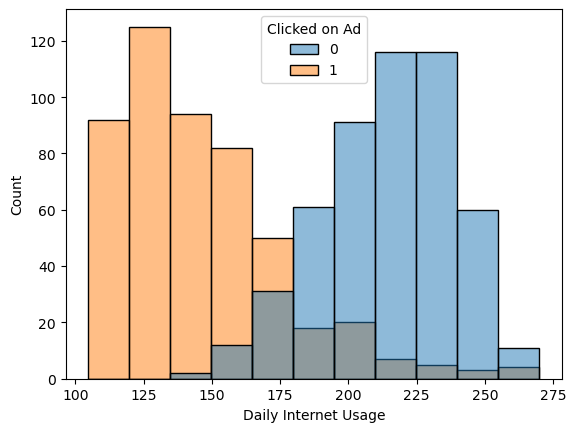

In [39]:
sns.histplot(x = 'Daily Internet Usage', hue = 'Clicked on Ad', data = data)

<Axes: xlabel='Male', ylabel='Count'>

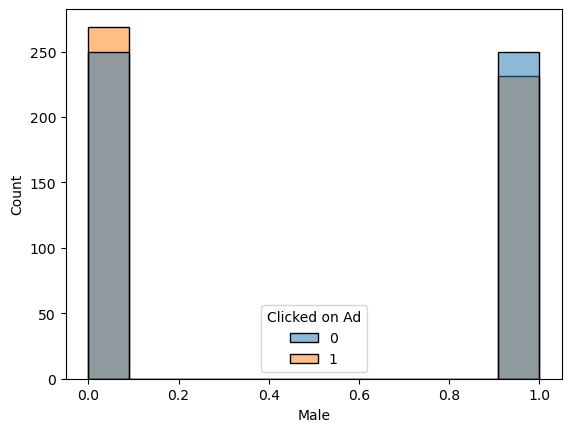

In [40]:
sns.histplot(x = 'Male', hue = 'Clicked on Ad', data = data)

<Axes: xlabel='Age', ylabel='Count'>

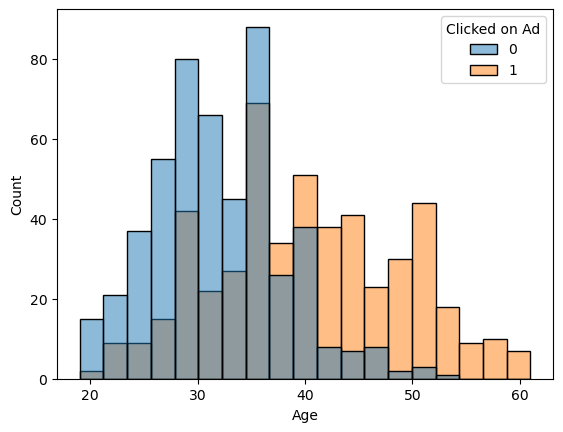

In [41]:
sns.histplot(x = 'Age', hue = 'Clicked on Ad', data = data)

<Axes: xlabel='Area Income', ylabel='Count'>

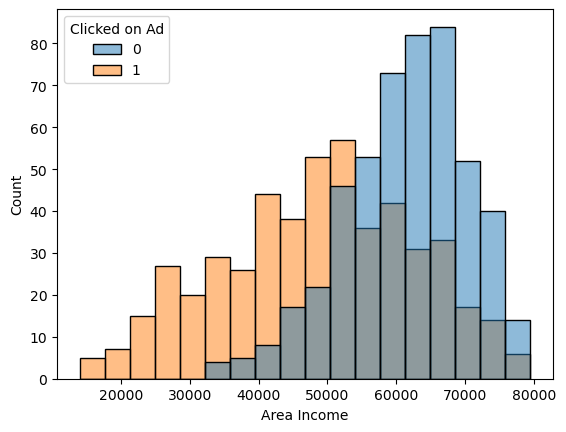

In [42]:
sns.histplot(x = 'Area Income', hue = 'Clicked on Ad', data = data)

In [43]:
X = data.drop(['Ad Topic Line', 'City', 'Country', 'Timestamp', 'Clicked on Ad'], axis = 1)
y = data['Clicked on Ad']

In [44]:
X.columns = [col.replace(' ', '') for col in X.columns]
X.columns

Index(['DailyTimeSpentonSite', 'Age', 'AreaIncome', 'DailyInternetUsage',
       'Male'],
      dtype='object')

In [45]:
from sklearn.preprocessing import RobustScaler
rb = RobustScaler()
X_scaled = rb.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 3)

In [48]:
# 가우시안 나이브베이즈를 이용해 분류분석
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [50]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
pred = gnb.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.9566666666666667
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       148
           1       0.96      0.95      0.96       152

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300

